In [1]:
!pip install statsmodels
!pip install openpyxl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier,DummyRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import tree
from sklearn.tree import plot_tree
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 38.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 41.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


## Producer Price Index (PPI) Data Cleaning

In [2]:
data = pd.read_excel('142 ppi.xlsx', engine='openpyxl')

In [3]:
#clean data from above (3 columns: type of fruit, yearmonth [2023-01], ppi)
df = pd.DataFrame(data)
df = df.drop(['% chg.\nOCT ê'], axis=1)

ppi = pd.melt(df, id_vars=['type of fruit', 'Year'], var_name='Month', value_name='ppi')
d = {'Jan':'1', 'Feb':'2', 'Mar':'3', 'Apr':'4', 'May':'5', 
'Jun':'6', 'Jul':'7', 'Aug':'8', 'Sep':'9', 'Oct':'10', 'Nov':'11', 'Dec':'12'}
ppi['Month'] = ppi['Month'].map(d)
ppi['year_month'] = ppi['Month'] + "/" + ppi['Year'].astype(str)

ppi = ppi[['type of fruit', 'year_month', 'ppi']]
ppi = ppi[ppi['type of fruit'] != 'Rome Apples']
ppi

,type of fruit,year_month,ppi
0,Golden Delicious Apples,1/2023,233.300
1,Golden Delicious Apples,1/2022,193.800
2,Golden Delicious Apples,1/2021,165.000
3,Golden Delicious Apples,1/2020,167.500
4,Golden Delicious Apples,1/2019,152.700
...,...,...,...
475,Table Grapes,12/2023,NaN
476,Table Grapes,12/2022,140.534
477,Table Grapes,12/2021,172.220
478,Table Grapes,12/2020,126.800


In [4]:

fruit_avg = ppi.groupby('type of fruit')['ppi'].mean()

ppi['ppi'] = ppi.groupby('type of fruit')['ppi'].transform(lambda x: x.fillna(x.mean()))

## Rainfall Data Cleaning

In [5]:
rainfall_data = pd.read_excel('rainfall data.xlsx', engine='openpyxl')
rainfall_data

,EventId,Type,Severity,Month,Day,StartTime(UTC).4,Precipitation(in),TimeZone,AirportCode,LocationLat,LocationLng,City,County,State,ZipCode
0,W-52,Rain,Light,2,19,2016,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
1,W-83,Rain,Light,4,9,2016,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
2,W-84,Rain,Light,4,9,2016,0.06,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
3,W-85,Rain,Light,4,11,2016,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
4,W-86,Rain,Light,4,11,2016,0.00,US/Mountain,K04V,38.0972,-106.1689,Saguache,Saguache,CO,81149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729097,W-9089110,Rain,Light,10,31,2016,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
729098,W-9089112,Rain,Light,10,31,2016,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
729099,W-9089113,Rain,Light,11,9,2016,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0
729100,W-9089114,Rain,Light,11,17,2016,0.00,US/Mountain,KBVR,42.5833,-108.2833,Lander,Fremont,WY,82520.0


In [6]:
df1 = pd.read_excel('rainfall data.xlsx', '2016')
df1['Combined'] = df1['Month'].astype(str) + '/' + df1['StartTime(UTC).4'].astype(str)

weather_2016 = df1.groupby(['Combined','State', 'TimeZone']).mean().drop(['Month', 'Day', 'LocationLat', 'LocationLng', 'ZipCode', 'StartTime(UTC).4'], axis = 1).reset_index()
weather_2016

,Combined,State,TimeZone,Precipitation(in)
0,1/2016,AL,US/Central,0.141537
1,1/2016,AR,US/Central,0.095572
2,1/2016,AZ,US/Mountain,0.037300
3,1/2016,CA,US/Mountain,0.142024
4,1/2016,CA,US/Pacific,0.118513
...,...,...,...,...
741,9/2016,VT,US/Eastern,0.111390
742,9/2016,WA,US/Pacific,0.052172
743,9/2016,WI,US/Central,0.134756
744,9/2016,WV,US/Eastern,0.162640


In [7]:
df2 = pd.read_excel('rainfall data.xlsx', '2017')
df2['Month'] = df2['StartTime(UTC).2'].astype(str).str[1:]
df2['Year'] = df2['StartTime(UTC).1'].astype(str).str[1:]
df2['Combined'] = df2['Month'] + '/' + df2['Year']

weather_2017 = df2.groupby(['Combined','State', 'TimeZone']).mean().drop(['StartTime(UTC).1', 'StartTime(UTC).2', 'LocationLat', 'LocationLng', 'ZipCode'], axis = 1).reset_index()
weather_2017

,Combined,State,TimeZone,Precipitation(in)
0,1/2017,AL,US/Central,0.253620
1,1/2017,AR,US/Central,0.113346
2,1/2017,AZ,US/Mountain,0.038250
3,1/2017,CA,US/Pacific,0.126557
4,1/2017,CO,US/Eastern,0.000690
...,...,...,...,...
748,9/2017,VT,US/Eastern,0.103824
749,9/2017,WA,US/Pacific,0.055164
750,9/2017,WI,US/Central,0.085741
751,9/2017,WV,US/Eastern,0.064008


In [8]:
df3 = pd.read_excel('rainfall data.xlsx', '2018')
df3['Combined'] = df3['Month'].astype(str) + '/' + df3['Year'].astype(str)

weather_2018 = df3.groupby(['Combined','State', 'TimeZone']).mean().drop(['Month', 'Day', 'LocationLat', 'LocationLng', 'ZipCode', 'Year'], axis = 1).reset_index()
weather_2018

,Combined,State,TimeZone,Precipitation(in)
0,1/2018,AL,US/Central,0.093627
1,1/2018,AR,US/Central,0.142834
2,1/2018,AZ,US/Mountain,0.046194
3,1/2018,CA,US/Mountain,0.163478
4,1/2018,CA,US/Pacific,0.119921
...,...,...,...,...
744,9/2018,VT,US/Eastern,0.147059
745,9/2018,WA,US/Pacific,0.062872
746,9/2018,WI,US/Central,0.129590
747,9/2018,WV,US/Eastern,0.177910


In [9]:
df4 = pd.read_excel('rainfall data.xlsx', '2019')
df4['Combined'] = df4['Month'].astype(str) + '/' + df4['Year'].astype(str)

weather_2019 = df4.groupby(['Combined','State','TimeZone']).mean().drop(['Month', 'Day','Year', 'LocationLat', 'LocationLng', 'ZipCode'], axis = 1).reset_index()
weather_2019

,Combined,State,TimeZone,Precipitation(in)
0,1/2019,AL,US/Central,0.153303
1,1/2019,AR,US/Central,0.147115
2,1/2019,AZ,US/Mountain,0.042261
3,1/2019,CA,US/Mountain,0.109189
4,1/2019,CA,US/Pacific,0.119451
...,...,...,...,...
748,9/2019,VT,US/Eastern,0.084565
749,9/2019,WA,US/Pacific,0.080291
750,9/2019,WI,US/Central,0.093628
751,9/2019,WV,US/Eastern,0.070825


In [10]:
df5 = pd.read_excel('rainfall data.xlsx', '2020')
df5['Combined'] = df5['Month'].astype(str) + '/' + df5['Year'].astype(str)

weather_2020 = df5.groupby(['Combined','State','TimeZone']).mean().drop(['Month', 'Day','Year', 'LocationLat', 'LocationLng', 'ZipCode'], axis = 1).reset_index()
weather_2020

,Combined,State,TimeZone,Precipitation(in)
0,1/2020,AL,US/Central,0.126516
1,1/2020,AR,US/Central,0.090600
2,1/2020,AZ,US/Mountain,0.027883
3,1/2020,CA,US/Mountain,0.104375
4,1/2020,CA,US/Pacific,0.090532
...,...,...,...,...
743,9/2020,VT,US/Eastern,0.190991
744,9/2020,WA,US/Pacific,0.073575
745,9/2020,WI,US/Central,0.081039
746,9/2020,WV,US/Eastern,0.101550


In [11]:
df6 = pd.read_excel('rainfall data.xlsx', '2021')
df6['Combined'] = df6['Month'].astype(str) + '/' + df6['Year'].astype(str)

weather_2021 = df6.groupby(['Combined','State','TimeZone']).mean().drop(['Month', 'Day','Year', 'LocationLat', 'LocationLng', 'ZipCode'], axis = 1).reset_index()
weather_2021

,Combined,State,TimeZone,Precipitation(in)
0,1/2021,AL,US/Central,0.108641
1,1/2021,AR,US/Central,0.105400
2,1/2021,AZ,US/Mountain,0.037946
3,1/2021,CA,US/Pacific,0.110525
4,1/2021,CO,US/Mountain,0.004667
...,...,...,...,...
742,9/2021,VT,US/Eastern,0.109547
743,9/2021,WA,US/Pacific,0.095421
744,9/2021,WI,US/Central,0.069838
745,9/2021,WV,US/Eastern,0.148366


In [12]:
df7 = pd.read_excel('rainfall data.xlsx', '2022')
df7['Combined'] = df7['Month'].astype(str) + '/' + df7['Year'].astype(str)

weather_2022 = df7.groupby(['Combined','State','TimeZone']).mean().drop(['Month', 'Day','Year', 'LocationLat', 'LocationLng', 'ZipCode'], axis = 1).reset_index()
weather_2022

,Combined,State,TimeZone,Precipitation(in)
0,1/2022,AL,US/Central,0.124522
1,1/2022,AR,US/Central,0.151531
2,1/2022,AZ,US/Mountain,0.017918
3,1/2022,CA,US/Mountain,0.000000
4,1/2022,CA,US/Pacific,0.049536
...,...,...,...,...
742,9/2022,VT,US/Eastern,0.128027
743,9/2022,WA,US/Pacific,0.031961
744,9/2022,WI,US/Central,0.104064
745,9/2022,WV,US/Eastern,0.096277


In [13]:
rainfall = pd.concat([weather_2016, weather_2017, weather_2018, weather_2019, weather_2020, weather_2021, weather_2022], axis=0)
rainfall

,Combined,State,TimeZone,Precipitation(in)
0,1/2016,AL,US/Central,0.141537
1,1/2016,AR,US/Central,0.095572
2,1/2016,AZ,US/Mountain,0.037300
3,1/2016,CA,US/Mountain,0.142024
4,1/2016,CA,US/Pacific,0.118513
...,...,...,...,...
742,9/2022,VT,US/Eastern,0.128027
743,9/2022,WA,US/Pacific,0.031961
744,9/2022,WI,US/Central,0.104064
745,9/2022,WV,US/Eastern,0.096277


In [14]:
rainfall.to_csv('fixed_rainfall')

In [ ]:
rainfall = pd.read_csv('fixed_rainfall')
rainfall = rainfall.drop(['Unnamed: 0'], axis=1)
rainfall

,Combined,State,TimeZone,Precipitation(in)
0,1/2016,AL,US/Central,0.141537
1,1/2016,AR,US/Central,0.095572
2,1/2016,AZ,US/Mountain,0.037300
3,1/2016,CA,US/Mountain,0.142024
4,1/2016,CA,US/Pacific,0.118513
...,...,...,...,...
5238,9/2022,VT,US/Eastern,0.128027
5239,9/2022,WA,US/Pacific,0.031961
5240,9/2022,WI,US/Central,0.104064
5241,9/2022,WV,US/Eastern,0.096277


In [ ]:
rainppi = rainfall.merge(ppi, how = 'inner', left_on = 'Combined', right_on = 'year_month')
rainppi['year_month'] = pd.to_datetime(rainppi['year_month'], format='%m/%Y')
rainppi['Season'] = rainppi['year_month'].dt.month.map({
    1: 'Winter', 2: 'Winter', 3: 'Spring',
    4: 'Spring', 5: 'Spring', 6: 'Summer',
    7: 'Summer', 8: 'Summer', 9: 'Fall',
    10: 'Fall', 11: 'Fall', 12: 'Winter'
})
rainppi.drop(['Combined'], axis = 1, inplace=True)
rainppi = rainppi.rename(columns={"type of fruit": "type_of_fruit"})
rainppi

,State,TimeZone,Precipitation(in),type_of_fruit,year_month,ppi,Season
0,AL,US/Central,0.153303,Golden Delicious Apples,2019-01-01,152.700000,Winter
1,AL,US/Central,0.153303,Granny Smith Apples,2019-01-01,196.100000,Winter
2,AL,US/Central,0.153303,McIntosh Apples,2019-01-01,195.100000,Winter
3,AL,US/Central,0.153303,Red Delicious Apples,2019-01-01,214.600000,Winter
4,AL,US/Central,0.153303,Navel Oranges,2019-01-01,152.400000,Winter
...,...,...,...,...,...,...,...
20960,WY,US/Mountain,0.045614,McIntosh Apples,2022-09-01,244.600000,Fall
20961,WY,US/Mountain,0.045614,Red Delicious Apples,2022-09-01,239.400000,Fall
20962,WY,US/Mountain,0.045614,Navel Oranges,2022-09-01,202.008889,Fall
20963,WY,US/Mountain,0.045614,Valencia Oranges,2022-09-01,263.200000,Fall


In [ ]:
# splitting into training and testing datsets

X = rainppi[['State', 'TimeZone', 'Precipitation(in)', 'type_of_fruit', 'Season']]
X = pd.get_dummies(X, drop_first = True)
y = rainppi['ppi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

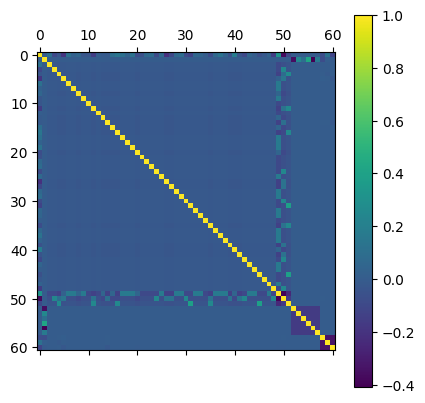

In [ ]:
plt.matshow(pd.get_dummies(rainppi, drop_first = True).corr())
cb = plt.colorbar()
plt.show()

In [ ]:
corr = pd.get_dummies(rainppi, drop_first = True).corr()
corr.style.background_gradient(cmap='coolwarm')

,Precipitation(in),ppi,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,TimeZone_US/Eastern,TimeZone_US/Mountain,TimeZone_US/Pacific,type_of_fruit_Granny Smith Apples,type_of_fruit_McIntosh Apples,type_of_fruit_Navel Oranges,type_of_fruit_Red Delicious Apples,type_of_fruit_Table Grapes,type_of_fruit_Valencia Oranges,Season_Spring,Season_Summer,Season_Winter
Precipitation(in),1.000000,0.004304,0.118950,-0.100079,-0.034478,-0.189642,0.118295,0.028525,0.057515,-0.032908,-0.030322,-0.152441,0.012366,-0.009714,-0.009024,0.097769,0.144289,0.110765,0.041172,0.120122,-0.068244,-0.060318,0.067517,0.087615,-0.080861,0.072375,-0.210308,-0.105505,0.065225,0.097104,-0.080685,-0.127588,0.058619,0.049135,0.004804,-0.076897,0.068830,0.125716,0.041779,-0.054740,0.186514,-0.045155,-0.097617,0.052323,0.005507,-0.057927,-0.022274,0.033523,-0.152010,0.323984,-0.368897,-0.106032,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.069174,0.118594,-0.118797
ppi,0.004304,1.000000,0.000136,0.000136,-0.002923,0.000914,0.000136,0.000136,0.000194,0.000136,0.000136,0.000194,0.000136,0.000194,-0.003082,0.000194,0.000194,0.000136,0.000136,0.000136,-0.000478,0.000136,0.000136,0.000136,0.000136,0.000136,0.000194,0.000194,0.000136,0.000136,0.000136,0.000136,0.000136,0.000136,0.000136,0.000194,0.000136,0.000136,0.000136,0.000194,0.000194,0.000194,0.000136,0.000136,0.000136,0.000136,0.000136,0.000136,0.000136,0.001062,-0.002028,0.000348,-0.357252,0.247764,0.104617,0.419114,-0.409275,0.165672,-0.073838,0.012510,-0.009379
State_AR,0.118950,0.000136,1.000000,-0.016288,-0.021679,-0.021944,-0.016288,-0.016288,-0.023224,-0.016288,-0.016288,-0.023224,-0.016288,-0.023224,-0.022464,-0.023224,-0.023224,-0.016288,-0.016288,-0.016288,-0.023099,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.023224,-0.023224,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.023224,-0.016288,-0.016288,-0.016288,-0.023224,-0.023224,-0.023224,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.096816,-0.067456,-0.041628,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000613,-0.000123,0.000864
State_AZ,-0.100079,0.000136,-0.016288,1.000000,-0.021679,-0.021944,-0.016288,-0.016288,-0.023224,-0.016288,-0.016288,-0.023224,-0.016288,-0.023224,-0.022464,-0.023224,-0.023224,-0.016288,-0.016288,-0.016288,-0.023099,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.023224,-0.023224,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.023224,-0.016288,-0.016288,-0.016288,-0.023224,-0.023224,-0.023224,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.016288,-0.096816,0.241458,-0.041628,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000613,-0.000123,0.000864
State_CA,-0.034478,-0.002923,-0.021679,-0.021679,1.000000,-0.029208,-0.021679,-0.021679,-0.030912,-0.021679,-0.021679,-0.030912,-0.021679,-0.030912,-0.029900,-0.030912,-0.030912,-0.021679,-0.021679,-0.021679,-0.030745,-0.021679,-0.021679,-0.021679,-0.021679,-0.021679,-0.030912,-0.030912,-0.021679,-0.021679,-0.021679,-0.021679,-0.021679,-0.021679,-0.021679,-0.030912,-0.021679,-0.021679,-0.021679,-0.030912,-0.030912,-0.030912,-0.021679,-0.021679,-0.021679,-0.021679,-0.021679,-0.021679,-0.021679,-0.128865,0.086432,0.273851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008498,-0.009499,0.005839
State_CO,-0.189642,0.000914,-0.021944,-0.021944,-0.029208,1.000000,-0.021944,-0.021944,-0.031289,-0.021944,-0.021944,-0.031289,-0.021944,-0.031289,-0.030264,-0.031289,-0.031289,-0.021944,-0.021944,-0.021944,-0.031120,-0.021944,-0.021944,-0.021944,-0.021944,-0.021944,-0.031289,-0

In [ ]:
# baseline model
avg_ppi = ppi['ppi'].mean()

baseline_mse = np.mean((avg_ppi - ppi['ppi']) ** 2)

print(f'Average PPI: {avg_ppi}')
print(f'Baseline Accuracy (MSE): {baseline_mse}')

Average PPI: 195.05830224432395
Baseline Accuracy: 1747.2954607284898


In [ ]:
#OLS 

ppiols = sm.OLS(y, X)
results = ppiols.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    ppi   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                          1.228e+04
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        19:03:53   Log-Likelihood:                     -1.0215e+05
No. Observations:               20965   AIC:                                  2.044e+05
Df Residuals:                   20905   BIC:                                  2.049e+05
Df Model:                          60                                                  
Covariance Type:            nonrobust                                                  
                                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [ ]:
# linear regression

linreg_model = LinearRegression()
result = linreg_model.fit(X_train, y_train)

# make predictions
y_pred = linreg_model.predict(X_test)

# calculate accuracy
lin_acc = result.score(X_test, y_test)

print(f'LinReg Test Accuracy: {lin_acc}')
print(f"intercept: {result.intercept_}")
print(f"coefficients: {result.coef_}")

linreg_mse = mean_squared_error(y_test, y_pred)
rmse = linreg_mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {linreg_mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

LinReg Test Accuracy: 0.523446785269594
intercept: 175.01581324341456
coefficients: [-4.04950997e+00  1.60733893e+00  2.91565460e+00  4.97047839e-01
  1.61516583e+00  1.66616006e+00 -4.70966647e-01  2.23603610e+00
  1.88068439e+00  5.83302012e-02 -1.61762521e-02  2.58782531e+00
  3.59112134e-01  9.84158735e-01  1.82061443e+00 -1.86300215e-01
  1.91810603e+00  1.48436044e+00  1.21334557e+00  6.16015752e-01
  3.08729002e+00  1.84327303e+00  2.39440271e+00  6.83144926e-01
  1.09978939e+00  1.00888871e+00  1.90806870e+00  1.88141345e+00
  2.65372702e+00  1.68512120e+00 -5.08522361e-01  3.07225356e+00
  2.84445077e+00  1.32974578e+00  8.43617031e-01  2.53609228e+00
  1.34183494e+00  4.67483785e-01  1.47592574e+00  3.15575438e+00
  1.40766135e+00  2.19319286e+00  1.44893570e+00  1.75093875e+00
  1.89282618e+00  8.10663743e-01  7.66181080e-01  1.32965154e+00
  8.13093907e-02  4.14995310e-01  1.47563056e+00 -1.64373898e+01
  3.62561049e+01  2.41328610e+01  5.11634957e+01 -2.15173275e+01
  2.90

In [ ]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 1, random_state=42)
elastic_net.fit(X_train, y_train)

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 0.8],
    'l1_ratio': [0, 0.3, 0.5, 0.7, 1]
}

grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train.ravel())
print("Best hyperparameters:", grid_search.best_params_)
best_elastic_net = grid_search.best_estimator_

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

y_pred = elastic_net.predict(X_test)

elasticnet_mse = mean_squared_error(y_test, y_pred)
rmse = elasticnet_mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {elasticnet_mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.765e+06, tolerance: 1.440e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.751e+06, tolerance: 1.445e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implem

In [ ]:
# decision tree/CART 
dtr = DecisionTreeRegressor(random_state = 42) 
dtr = dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
dtr_mse = mean_squared_error(y_test, y_pred_dtr)
print (f'Decision Tree MSE: {dtr_mse}')

Decision Tree MSE: 1179.557280509673


61


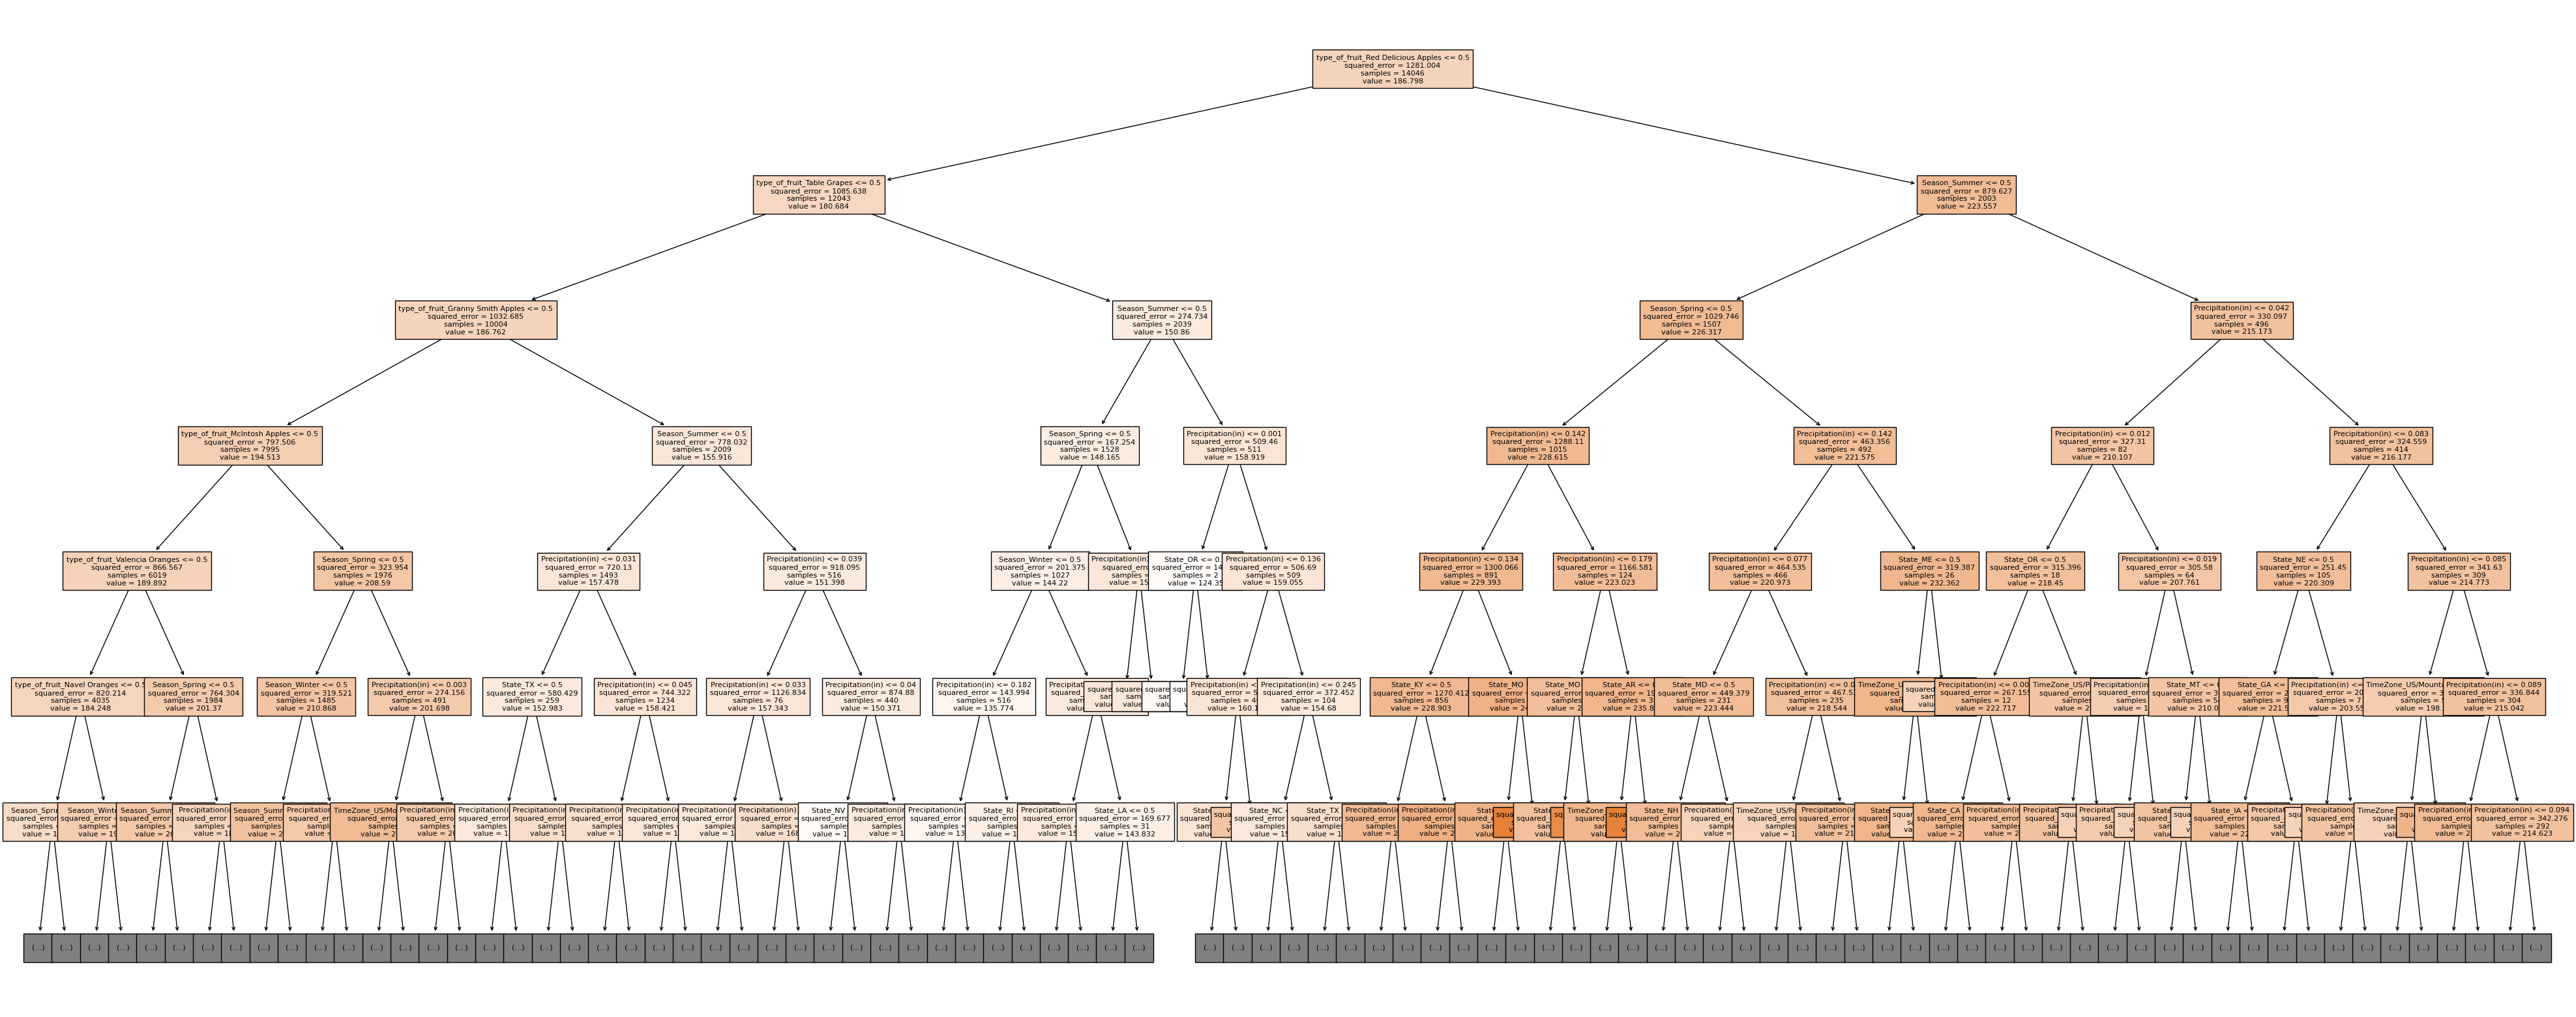

In [ ]:
# decision tree with CART visualization

dtr = tree.DecisionTreeRegressor(random_state=42)
dtr = dtr.fit(X_train, y_train)
fig = plt.figure(figsize=(50,20))
tree.plot_tree(dtr, 
          max_depth = 6,
          feature_names=X_train.columns, 
          filled=True,
          impurity=True,
          fontsize=8)

fig.savefig("cart_reg_tree.png")
print(dtr.tree_.max_depth)

In [ ]:
# decision trees with cross validation

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtr = DecisionTreeRegressor(random_state=42)
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, cv=10, error_score ='raise').fit(X_train, y_train)
y_pred = dtr_cv.predict(X_test)

dtrcv_mse = mean_squared_error(y_test, y_pred)
print (f'Decision Tree MSE: {dtrcv_mse}')

Decision Tree MSE: 950.05846623715


Node count = 3369


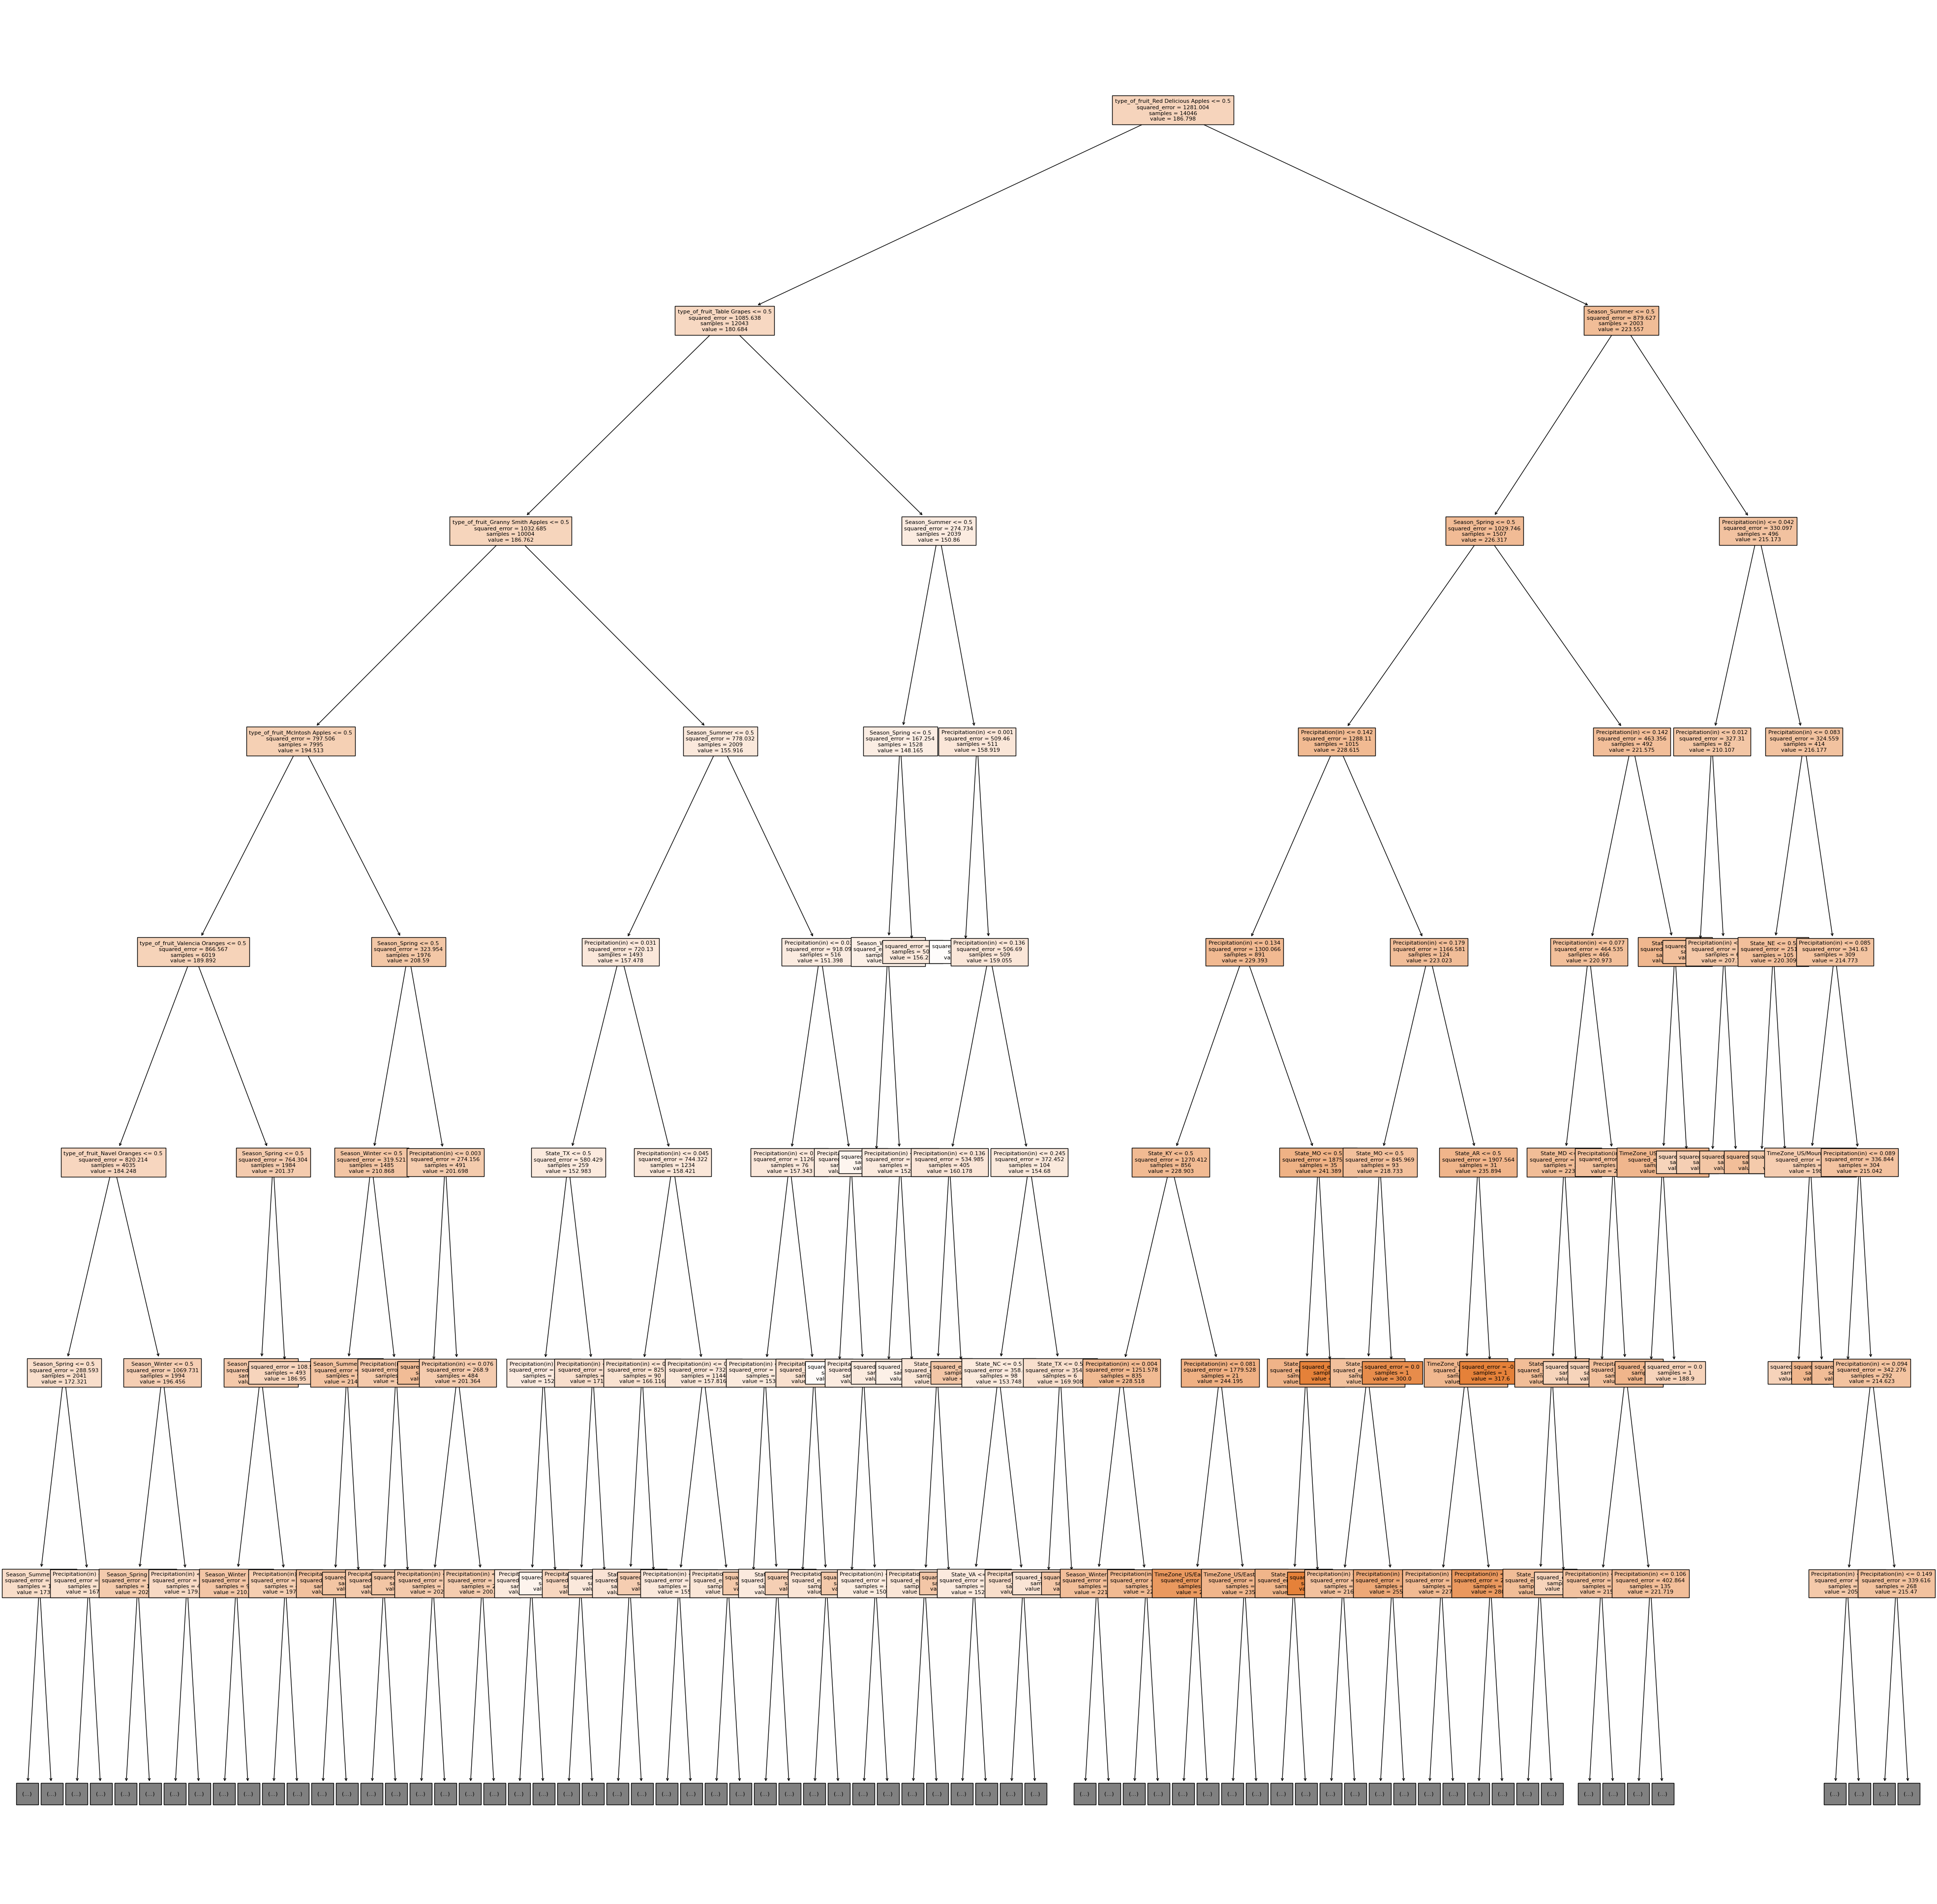

In [ ]:
# decision tree with cv accuracy visualization

print('Node count =', dtr_cv.best_estimator_.tree_.node_count)
fig = plt.figure(figsize=(50, 50))
plot_tree(dtr_cv.best_estimator_, 
          feature_names=X_train.columns, 
          filled=True,
          impurity=True,
          fontsize=8,
          max_depth = 7) 
plt.show()

fig.savefig("cv_acc_reg_tree.png")
print(dtr_cv.tree_.max_depth)

In [ ]:
#random forest
rfr = RandomForestRegressor(random_state = 2023) 
fittedrfr = rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
print (f'Random Forest MSE: {rf_mse}')

Random Forest MSE: 725.0907548285021


In [ ]:
values = {
'Baseline Model':[baseline_mse],
'Logistic Regression':[linreg_mse],
'Decision Tree':[dtr_mse],
'Cross Validated Decision Tree':[dtrcv_mse],
'Random Forest': [rf_mse],
}
table = pd.DataFrame(values, index = ['Accuracy (MSE)'])
table

,Baseline Model,Logistic Regression,Decision Tree,Cross Validated Decision Tree,Random Forest
Accuracy (MSE),1747.295461,636.174689,1179.557281,950.058466,725.090755


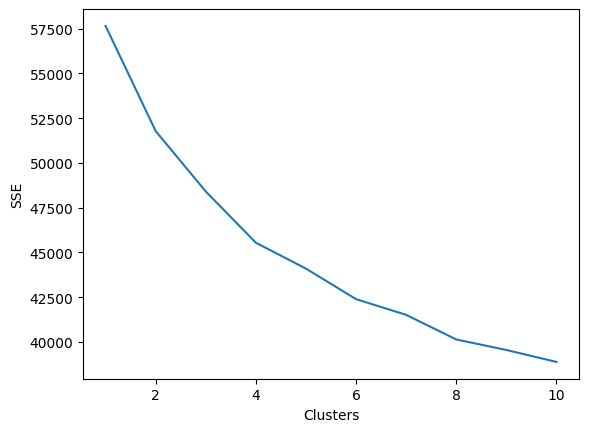

In [ ]:
from sklearn.cluster import KMeans

kmeans_inertias = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', random_state=42)
    k_means.fit(X)
    kmeans_inertias.append(k_means.inertia_)

#plot elbow curve
plt.plot(np.arange(1,11), kmeans_inertias)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

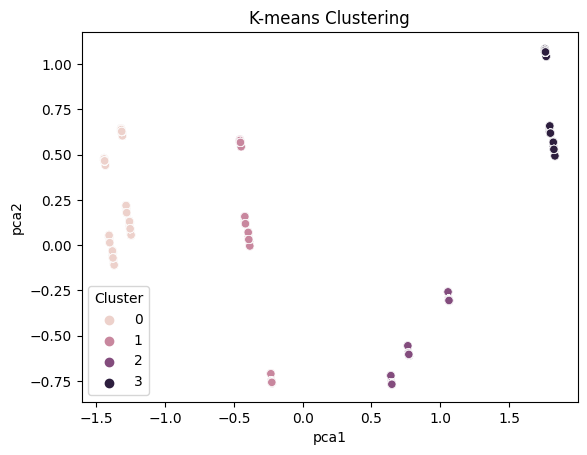

In [ ]:
clustering_kmeans = KMeans(n_clusters=4)
X['Cluster'] = clustering_kmeans.fit_predict(X)

reduced_data = PCA(n_components = 2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x = "pca1", y = "pca2", hue = X['Cluster'], data = results)
plt.title('K-means Clustering')
plt.show()

In [ ]:
X['Cluster'].value_counts()

0    6629
2    5726
1    5285
3    3325
Name: Cluster, dtype: int64

In [ ]:
cluster0 = X[X['Cluster'] == 0]
prec_mean = cluster1['Precipitation(in)'].mean()
print(f"Cluster 0 Average Precipitation {prec_mean}")

for column in cluster0.columns:
    column_sum = cluster0[column].sum()
    print(f"{column}: {column_sum}")

Cluster 0 Average Precipitation 0.08392888082252226
Precipitation(in): 459.0606659272455
State_AR: 168
State_AZ: 168
State_CA: 294
State_CO: 168
State_CT: 0
State_DE: 0
State_FL: 168
State_GA: 0
State_IA: 168
State_ID: 336
State_IL: 168
State_IN: 168
State_KS: 294
State_KY: 168
State_LA: 336
State_MA: 0
State_MD: 0
State_ME: 0
State_MI: 161
State_MN: 168
State_MO: 168
State_MS: 168
State_MT: 168
State_NC: 0
State_ND: 336
State_NE: 336
State_NH: 0
State_NJ: 0
State_NM: 168
State_NV: 168
State_NY: 0
State_OH: 0
State_OK: 168
State_OR: 336
State_PA: 0
State_RI: 0
State_SC: 0
State_SD: 336
State_TN: 168
State_TX: 336
State_UT: 168
State_VA: 0
State_VT: 0
State_WA: 168
State_WI: 168
State_WV: 0
State_WY: 168
TimeZone_US/Eastern: 0
TimeZone_US/Mountain: 2268
TimeZone_US/Pacific: 1008
type_of_fruit_Granny Smith Apples: 947
type_of_fruit_McIntosh Apples: 947
type_of_fruit_Navel Oranges: 947
type_of_fruit_Red Delicious Apples: 947
type_of_fruit_Table Grapes: 947
type_of_fruit_Valencia Oranges: 

In [ ]:
cluster1 = X[X['Cluster'] == 1]
prec_mean = cluster1['Precipitation(in)'].mean()
print(f"Cluster 1 Average Precipitation {prec_mean}")

for column in cluster1.columns:
    column_sum = cluster1[column].sum()
    print(f"{column}: {column_sum}")

Cluster 1 Average Precipitation 0.07976787925124058
Precipitation(in): 421.5732418428065
State_AR: 84
State_AZ: 84
State_CA: 161
State_CO: 168
State_CT: 84
State_DE: 84
State_FL: 168
State_GA: 84
State_IA: 84
State_ID: 168
State_IL: 84
State_IN: 168
State_KS: 168
State_KY: 168
State_LA: 168
State_MA: 84
State_MD: 84
State_ME: 84
State_MI: 168
State_MN: 84
State_MO: 84
State_MS: 84
State_MT: 84
State_NC: 84
State_ND: 168
State_NE: 168
State_NH: 84
State_NJ: 84
State_NM: 84
State_NV: 84
State_NY: 84
State_OH: 84
State_OK: 84
State_OR: 168
State_PA: 84
State_RI: 84
State_SC: 84
State_SD: 168
State_TN: 168
State_TX: 168
State_UT: 84
State_VA: 84
State_VT: 84
State_WA: 84
State_WI: 84
State_WV: 84
State_WY: 84
TimeZone_US/Eastern: 1932
TimeZone_US/Mountain: 1169
TimeZone_US/Pacific: 504
type_of_fruit_Granny Smith Apples: 755
type_of_fruit_McIntosh Apples: 755
type_of_fruit_Navel Oranges: 755
type_of_fruit_Red Delicious Apples: 755
type_of_fruit_Table Grapes: 755
type_of_fruit_Valencia Orang

In [ ]:
cluster2 = X[X['Cluster'] == 2]
prec_mean = cluster1['Precipitation(in)'].mean()
print(f"Cluster 2 Average Precipitation {prec_mean}")

for column in cluster2.columns:
    column_sum = cluster2[column].sum()
    print(f"{column}: {column_sum}")

Cluster 2 Average Precipitation 0.07976787925124058
Precipitation(in): 646.2193418579651
State_AR: 0
State_AZ: 0
State_CA: 0
State_CO: 182
State_CT: 252
State_DE: 252
State_FL: 252
State_GA: 252
State_IA: 0
State_ID: 0
State_IL: 0
State_IN: 252
State_KS: 0
State_KY: 252
State_LA: 0
State_MA: 252
State_MD: 252
State_ME: 252
State_MI: 252
State_MN: 0
State_MO: 0
State_MS: 0
State_MT: 0
State_NC: 252
State_ND: 0
State_NE: 0
State_NH: 252
State_NJ: 252
State_NM: 0
State_NV: 0
State_NY: 252
State_OH: 252
State_OK: 0
State_OR: 0
State_PA: 252
State_RI: 252
State_SC: 252
State_SD: 0
State_TN: 252
State_TX: 0
State_UT: 0
State_VA: 252
State_VT: 252
State_WA: 0
State_WI: 0
State_WV: 252
State_WY: 0
TimeZone_US/Eastern: 5726
TimeZone_US/Mountain: 0
TimeZone_US/Pacific: 0
type_of_fruit_Granny Smith Apples: 818
type_of_fruit_McIntosh Apples: 818
type_of_fruit_Navel Oranges: 818
type_of_fruit_Red Delicious Apples: 818
type_of_fruit_Table Grapes: 818
type_of_fruit_Valencia Oranges: 818
Season_Spring

In [ ]:
cluster3 = X[X['Cluster'] == 3]
prec_mean = cluster1['Precipitation(in)'].mean()
print(f"Cluster 3 Average Precipitation {prec_mean}")

for column in cluster3.columns:
    column_sum = cluster3[column].sum()
    print(f"{column}: {column_sum}")

Cluster 3 Average Precipitation 0.07976787925124058
Precipitation(in): 279.0635287348865
State_AR: 84
State_AZ: 84
State_CA: 133
State_CO: 84
State_CT: 0
State_DE: 0
State_FL: 84
State_GA: 0
State_IA: 84
State_ID: 168
State_IL: 84
State_IN: 84
State_KS: 168
State_KY: 84
State_LA: 168
State_MA: 0
State_MD: 0
State_ME: 0
State_MI: 84
State_MN: 84
State_MO: 84
State_MS: 84
State_MT: 84
State_NC: 0
State_ND: 168
State_NE: 168
State_NH: 0
State_NJ: 0
State_NM: 84
State_NV: 84
State_NY: 0
State_OH: 0
State_OK: 84
State_OR: 168
State_PA: 0
State_RI: 0
State_SC: 0
State_SD: 168
State_TN: 84
State_TX: 168
State_UT: 84
State_VA: 0
State_VT: 0
State_WA: 84
State_WI: 84
State_WV: 0
State_WY: 84
TimeZone_US/Eastern: 0
TimeZone_US/Mountain: 1141
TimeZone_US/Pacific: 504
type_of_fruit_Granny Smith Apples: 475
type_of_fruit_McIntosh Apples: 475
type_of_fruit_Navel Oranges: 475
type_of_fruit_Red Delicious Apples: 475
type_of_fruit_Table Grapes: 475
type_of_fruit_Valencia Oranges: 475
Season_Spring: 0
S

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d4947f7f-a851-4759-86dc-ef6dfd94a02b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>